1.0


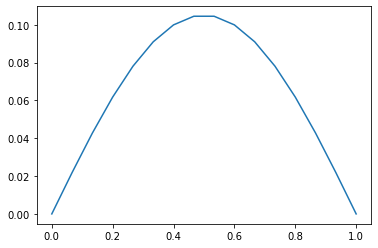

In [9]:
import matplotlib.pyplot as plt
import math
import numpy as np
from qiskit.circuit.library import NormalDistribution
from math import pi
from qiskit import IBMQ, BasicAer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.visualization import plot_histogram

########################################Preparing a sin wave function############################################
L = 1
n = 1
x = np.linspace(0,L, num=16)
storage_for_normalisation = []

#x = np.delete(xold,[0,9])

Normalisation_wavefunction = (np.sqrt(2/L)*(np.sin(n*pi*x/L)))

Normalisation_Constant = np.sum(Normalisation_wavefunction)

waveFunction = (math.sqrt(2/L)*np.sin(n*math.pi*x/L)/(Normalisation_Constant))

print(np.sum(waveFunction))

plt.plot(x,(waveFunction))
plt.show()

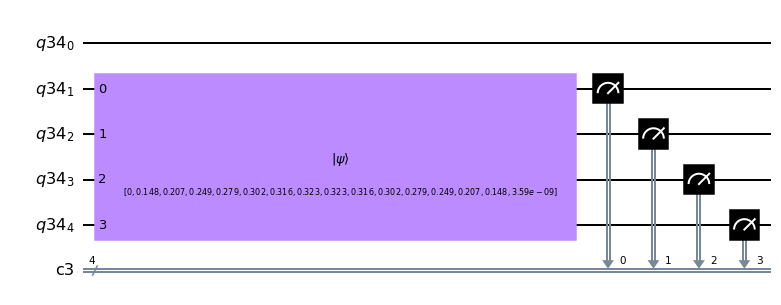

In [10]:


#n = 6 #number of qubits not including ancilla
phi = 0
V = 0
dt = 1

q = QuantumRegister(5)
c = ClassicalRegister(4)
qc = QuantumCircuit(q,c)

Hamiltonian = QuantumCircuit(q,c)




#########################################Initialisation######################################################


qc.initialize(np.sqrt(waveFunction), [q[1],q[2],q[3],q[4]])

#############################################################################################################

"""
qc.barrier()




###########################################Potential##############################################

qc.x(1)
qc.x(2)
qc.x(3)
qc.mct([1,2,3], 0)
qc.cp(V*dt,0,2)
qc.mct([1,2,3], 0)
qc.x(1)
qc.x(2)
qc.x(3)

qc.barrier()

qc.mct([1,2,3], 0)
qc.cp(V*dt,0,3)
qc.mct([1,2,3], 0)

qc.barrier()



##############################################QFT############################################################

qc.h(1); qc.cp(pi/2,2,1); qc.cp(pi/4,3,1)
qc.h(2); qc.cp(pi/2,3,2)
qc.h(3)
qc.x(3)

#############################################################################################################
qc.barrier()
qc.measure(1,0)
qc.measure(2,1)
qc.measure(3,2)


qc.barrier()





##################################################Time Step##################################################

qc.p(phi,3)
qc.p(phi/2,2)
qc.p(phi/4,1)


qc.cx(3,0); qc.cx(2,0)
qc.p(phi*2,0)
qc.cx(2,0); qc.cx(3,0)


qc.cx(1,0); qc.cx(3,0)
qc.p(phi,0)
qc.cx(3,0); qc.cx(1,0)



#qc.cx(3,0); qc.cx(2,0); qc.cx(1,0)
#qc.p(2*phi,0)
#qc.cx(1,0); qc.cx(2,0); qc.cx(3,0)

qc.cx(1,0); qc.cx(2,0)
qc.p(phi/2,0)
qc.cx(2,0); qc.cx(1,0)


##############################################################################################################

qc.barrier()





################################################Inverse QFT###################################################

qc.x(3)
qc.h(3)
qc.cp(-pi/2,3,2); qc.h(2)
qc.cp(-pi/4,2,1); qc.cp(-pi/2,3,1); qc.h(1)

##############################################################################################################

qc.barrier()





###############################################Measurement####################################################


#tvs = Hamiltonian.to_gate()

"""
qc.measure(1,0)
qc.measure(2,1)
qc.measure(3,2)
qc.measure(4,3)

qc.draw('mpl')


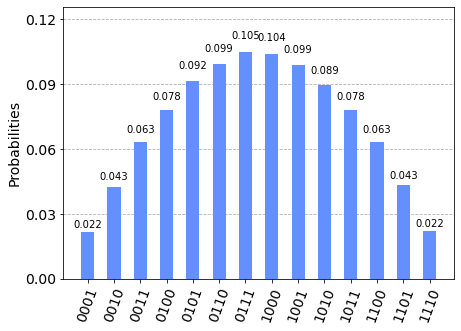

In [11]:
# use local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 65536
results = execute(qc, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)